# The Sparks Foundation - Data Science & Business Analytics Internship

## GRIP @ The Sparks Foundation

### By : Ahmed Rabie Saleh 

## TASK 6 Prediction using Design Tree Algorithm

In this task, we require to predict the optimum number of clusters for the iris data set using supervised machine learning algorithm (Design Tree )

## Steps :

<ul>
<li>Import libraries & Read the data</li>
<li>Explore the data</li>
<li>Encoding the the target</li>
<li>Spliting the model</li>
<li>Find optimal parameters for the model using GridSearchCV</li>
<li>Evaluate the model</li>
</ul>

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pydotplus
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Iris.xls')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Visualizing the model

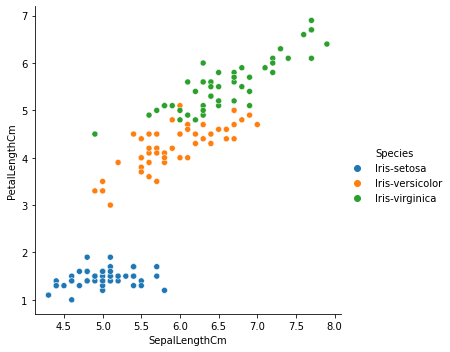

In [8]:
sns.relplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=df)

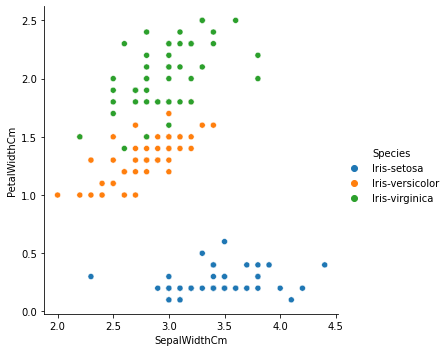

In [9]:
sns.relplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',data=df)

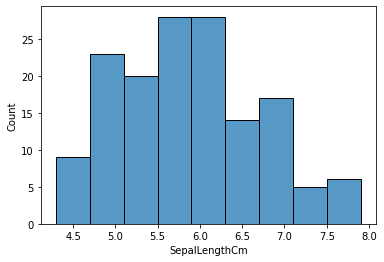

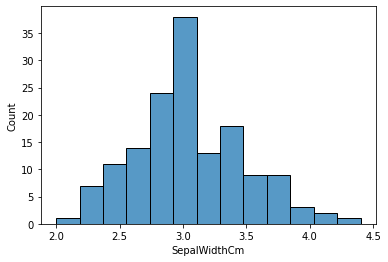

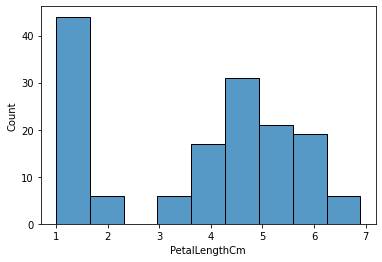

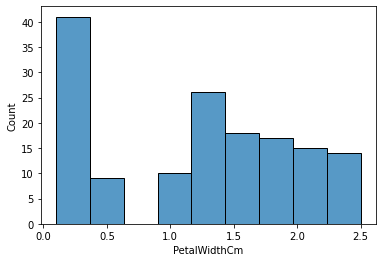

In [10]:
# check the distribution of data to ensure the data need normalize or not 
columns =['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for feature in columns:
    sns.histplot(data=df,x=feature)
    plt.show()

## Encoding the target 

In [11]:
# Encode the data
data = df.copy()
data['Species'] = data ['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y = data.iloc[:,-1]
X = data.drop(columns= ['Species' ,'Id'] )

## Splitting the data

In [12]:

X_train, X_test,y_train ,y_test = train_test_split(X,y,random_state=42,test_size=.35)

In [13]:
# Feature scalling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Find optimal parameters for the model using GridSearchCV

In [14]:
desigion_tree = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_features': [None, 'auto', 'sqrt', 'log2'],
              'max_depth': [None, 1, 2, 5, 10],
              'min_samples_split': [2, 5, 10],
              'random_state': range(1,100)}
desigion_tree_cv= GridSearchCV(desigion_tree, param_grid, cv=20,verbose=1,n_jobs=-1,error_score='raise')
desigion_tree_cv.fit(X_train, y_train)

Fitting 20 folds for each of 11880 candidates, totalling 237600 fits


GridSearchCV(cv=20, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 5, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'random_state': range(1, 100)},
             verbose=1)

In [15]:
desigion_tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 10,
 'random_state': 17}

In [16]:
y_pred = desigion_tree_cv.predict(X_test)

## Evaluating the model

In [17]:
accuracy_score(y_test,y_pred)

0.9811320754716981

In [18]:
confusion_matrix(y_pred,y_test)

array([[19,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 16]], dtype=int64)